## Cargar librerías

In [238]:
import matplotlib.pyplot as plt
import requests, re, os, glob
import pandas as pd
import numpy as np
import seaborn as sns

## Cambiar directorio

In [239]:
#os.chdir("/content/drive/MyDrive/PRONACES/python")
#Show directory
os.getcwd()

'c:\\Users\\pedro\\Documents\\programación\\python\\pronaces_analisis'

## Lista de archivos RETC

In [240]:
retcFiles = glob.glob("data/RETC_2004-2020/raw/*.xlsx")
retcFiles[:5]

['data/RETC_2004-2020\\Inconsistencias_2004.xlsx',
 'data/RETC_2004-2020\\Inconsistencias_2006.xlsx',
 'data/RETC_2004-2020\\Inconsistencias_2007.xlsx',
 'data/RETC_2004-2020\\Inconsistencias_2008.xlsx',
 'data/RETC_2004-2020\\Inconsistencias_2009.xlsx']

In [241]:
unidades = {
    "ton":1,
    "ton/año":1,
    "kg":1/1000,
    "Kg":1/1000,
    "kg/año":1/1000,
    "g":1/(1000*1000),
    
}
columnasContaminantes = [
    'AIRE', 'AGUA', 'SUELO', 'REUTILIZACIÓN', 'RECICLADO',
    'COPROCESAMIENTO', 'TRATAMIENTO', 'DISPOSICIÓN\nFINAL',
    'ALCANTARILLADO', 'INCINERACIÓN', 'OTROS']

rename_columns = {
    "delegación\municipio":"municipio",
    'coordenada\nutm x':'coordenada utm x', 
    'coordenada\nutm y':'coordenada utm y',
    'coordenada \nutm x':"coordenada utm x", 
    'coordenada \nutm y':"coordenada utm y",
    'latitud \nnorte' :'latitud norte',  
    'longitud \noeste':'longitud oeste',
    'número exterior':'núm. ext',
    'número interior':'núm. int',
    'no. exterior':'núm. ext', 
    'no. interior':'núm. int',
    'c.p.':"código postal",
    'clave\nambiental':'clave ambiental',
    'principal actividad productiva':'actividad principal',
    "descripción":"sustancia",
    "no. cas":"cas",
    "entidad federativa":"estado",
    "sustancias":"sustancia",
    "disposición\nfinal":"disposición final",
    "otros":"otro"
    }

col_emisiones = ['aire', 'agua', 'suelo', 'reuso']
col_transferencia = ['reciclado', 'coprocesamiento',
  'tratamiento', 'disposición final', 'alcantarillado', 'otro',
  'incineración', 'reutilización']

col_emisiones + col_transferencia

['aire',
 'agua',
 'suelo',
 'reuso',
 'reciclado',
 'coprocesamiento',
 'tratamiento',
 'disposición final',
 'alcantarillado',
 'otro',
 'incineración',
 'reutilización']

## Read RETC file

In [242]:
retcEmisiones = pd.DataFrame()
for file in retcFiles:
  year = file[-9:-5]
  # read excel file and use second sheet
  df = pd.read_excel(file, sheet_name=1)
  try:
    index = df[df.iloc[:,0] == 'NRA'].index[0]
  
  except IndexError:
    df['year'] = year
    df.columns = df.columns.str.lower()
    df.rename(columns=rename_columns, inplace=True)
    df["unidad"].replace(unidades, inplace=True)
    df = df[df['estado'] == 'COLIMA']
    retcEmisiones = pd.concat([retcEmisiones, df], ignore_index=True)
    continue

  header = df.iloc[df[df.iloc[:,0] == 'NRA'].index[0]]
  df.columns = header
  
  df = df.iloc[index+1:]
  # remove rows over df[df.iloc[:,0] == 'NRA'].index[0]
  #df = df[:df[df.iloc[:,0] == 'NRA'].index[0]]
  df['year'] = year
  df.columns = df.columns.str.lower()
  df.rename(columns=rename_columns, inplace=True)
  df["unidad"].replace(unidades, inplace=True)
  df = df[df['estado'] == 'COLIMA']
  retcEmisiones = pd.concat([retcEmisiones, df], ignore_index=True)
  
  
for col in col_emisiones + col_transferencia:
  try:
    retcEmisiones[col] = retcEmisiones[col] * retcEmisiones["unidad"]  
  except:
    continue
#retcEmisiones = retcEmisiones[retcEmisiones['estado'] == 'COLIMA']
retcEmisiones.head()

,nra,nombre,estado,sector,sustancia,cas,unidad,aire,agua,suelo,...,tratamiento,disposición final,alcantarillado,otro,incineración,year,municipio,reutilización,establecimiento,grupo sustancia
0,CFEAD0600711,"COMISIÓN FEDERAL DE ELECTRICIDAD, CENTRAL TERM...",COLIMA,Generación de energia electrica,Bióxido de nitrógeno,10102-44-0,0.001,22288040,0,0,...,0,0,0,0,0,2013,Manzanillo,0,NaN,NaN
1,PREM90600723,PEMEX REFINACION TERMINAL DE ALMACENAMIENTO MA...,COLIMA,Petroleo y petroquimica,Acroleina,107-02-8,0.001,195282,0,0,...,0,0,0,0,0,2013,Manzanillo,0,NaN,NaN
2,ZEPQY0600711,ZETA GAS DEL PACIFICO S.A. DE C.V.,COLIMA,Petroleo y petroquimica,Cromo (compuestos),S/C3,0.001,1727.39,0,0,...,0,0,0.0436,0,0,2013,Manzanillo,0,NaN,NaN
3,CFEAD0600711,"COMISIÓN FEDERAL DE ELECTRICIDAD,COMPLEJO TERM...",COLIMA,Generación de energia electrica,Arsénico (compuestos),As,0.001,0.0,2729.2575,0.0,...,0.0,0.0,0.0,0.0,0.0,2014,Manzanillo,0.0,NaN,NaN
4,CFEAD0600711,"COMISIÓN FEDERAL DE ELECTRICIDAD,COMPLEJO TERM...",COLIMA,Generación de energia electrica,Cadmio (compuestos),Cd,0.001,0.0,27292.5752,0.0,...,0.0,0.0,0.0,0.0,0.0,2014,Manzanillo,0.0,NaN,NaN


In [243]:
col_emisiones + col_transferencia

['aire',
 'agua',
 'suelo',
 'reuso',
 'reciclado',
 'coprocesamiento',
 'tratamiento',
 'disposición final',
 'alcantarillado',
 'otro',
 'incineración',
 'reutilización']

In [244]:
dfFinal = pd.DataFrame()
for index, df in retcEmisiones.groupby("nra"):
  # fill NaN values in "nombre" using the first value
  df['nombre'].fillna(method='ffill', inplace=True)
  df[col_emisiones + col_transferencia].fillna(0, inplace=True)

  dfFinal = pd.concat([dfFinal, df], ignore_index=True)
  
  
for col in col_emisiones + col_transferencia:
  dfFinal[col] = dfFinal[col].astype(float)
  
dfFinal

C:\Users\pedro\AppData\Local\Temp\ipykernel_1532\519342485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_emisiones + col_transferencia].fillna(0, inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_1532\519342485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_emisiones + col_transferencia].fillna(0, inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_1532\519342485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,nra,nombre,estado,sector,sustancia,cas,unidad,aire,agua,suelo,...,tratamiento,disposición final,alcantarillado,otro,incineración,year,municipio,reutilización,establecimiento,grupo sustancia
0,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Xileno (mezcla de isómeros),1330-20-7,0.001,1320.110000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,2017,Manzanillo,0.0,NaN,NaN
1,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Benceno,71-43-2,0.001,543.020000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,2017,Manzanillo,0.0,NaN,NaN
2,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Benceno,71-43-2,0.001,888.501900,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,2018,Manzanillo,0.0,NaN,NaN
3,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Tolueno,108-88-3,0.001,1309.860000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,2018,Manzanillo,0.0,NaN,NaN
4,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Xileno (mezcla de isómeros),1330-20-7,0.001,2058.420000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,2018,Manzanillo,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,ZEPQY0600711,ZETA GAS DEL PACIFICO S.A. DE C.V.,COLIMA,Petroleo y petroquimica,Bióxido de carbono,124-38-9,1.0,0.000015,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,2013,Manzanillo,0.0,NaN,NaN
1250,ZEPQY0600711,ZETA GAS DEL PACIFICO S.A. DE C.V.,COLIMA,Petroleo y petroquimica,Níquel (compuestos),S/C5,0.001,2350.630000,0.0,0.0,...,0.0,0.0,0.021800,0.0,0.0,2013,Manzanillo,0.0,NaN,NaN
1251,ZEPQY0600711,ZETA GAS DEL PACIFICO S.A. DE C.V.,COLIMA,Petroleo y petroquimica,Arsénico (compuestos),S/C1,0.001,0.000000,0.0,0.0,...,0.0,0.0,0.004818,0.0,0.0,2013,Manzanillo,0.0,NaN,NaN
1252,ZEPQY0600711,ZETA GAS DEL PACIFICO S.A. DE C.V.,COLIMA,Petroleo y petroquimica,Cadmio (compuestos),S/C2,0.001,0.000000,0.0,0.0,...,0.0,0.0,0.002180,0.0,0.0,2013,Manzanillo,0.0,NaN,NaN


In [245]:
rename_sustancias = {
  'Arsénico (compuestos)':'Arsénico',
  'Cadmio (compuestos)':'Cadmio',
  'Cromo (polvos respirables, humos o vapores)': 'Cromo',
  'Cromo (compuestos)': 'Cromo',
  'Mercurio (compuestos)': 'Mercurio',
  'Níquel (polvos respirables, humos o vapores)': 'Níquel',
  'Níquel (compuestos)': 'Níquel',
  'Plomo (compuestos)': 'Plomo',
  'Plomo (polvos respirables, humos o vapores)': 'Plomo',
}
dfFinal["sustancia"].replace(rename_sustancias, inplace=True)

In [246]:
quimicos_to_remove = [
  'Bióxido de carbono','Oxido nitroso','Bióxido de nitrógeno','Metano',
]

In [247]:
dfFinal = dfFinal[~dfFinal["sustancia"].isin(quimicos_to_remove)].copy()

In [248]:


# replace "municipio" values
rename_municipios = {
  "Tecoman": "Tecomán",
  "Minatitlan": "Minatitlán",
  "Cuauhtemoc": "Cuauhtémoc",
  'Villa de Alvarez':"Villa de Álvarez",
  'Ixtlahuacan':"Ixtlahuacán",
  'Coquimatlan':"Coquimatlán",
}

dfFinal["municipio"].replace(rename_municipios, inplace=True)
dfFinal["municipio"].unique()

array(['Manzanillo', nan, 'Tecomán', 'Colima', 'Minatitlán',
       'Coquimatlán', 'Cuauhtémoc', 'Villa de Álvarez', 'Ixtlahuacán'],
      dtype=object)

# Panorama general de los datos

In [249]:
col_emisiones

['aire', 'agua', 'suelo', 'reuso']

In [250]:
# create a new column with the sum of col_emisiones
dfFinal["emisiones"] = dfFinal[col_emisiones].sum(axis=1)
dfFinal[col_emisiones] 

,aire,agua,suelo,reuso
0,1320.1100,0.0,0.0,NaN
1,543.0200,0.0,0.0,NaN
2,888.5019,0.0,0.0,NaN
3,1309.8600,0.0,0.0,NaN
4,2058.4200,0.0,0.0,NaN
...,...,...,...,...
1248,0.0000,0.0,0.0,NaN
1250,2350.6300,0.0,0.0,NaN
1251,0.0000,0.0,0.0,NaN
1252,0.0000,0.0,0.0,NaN


In [251]:
dfFinal.head()

,nra,nombre,estado,sector,sustancia,cas,unidad,aire,agua,suelo,...,disposición final,alcantarillado,otro,incineración,year,municipio,reutilización,establecimiento,grupo sustancia,emisiones
0,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Xileno (mezcla de isómeros),1330-20-7,0.001,1320.1100,0.0,0.0,...,0.0,0.0,0.0,0.0,2017,Manzanillo,0.0,NaN,NaN,1320.1100
1,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Benceno,71-43-2,0.001,543.0200,0.0,0.0,...,0.0,0.0,0.0,0.0,2017,Manzanillo,0.0,NaN,NaN,543.0200
2,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Benceno,71-43-2,0.001,888.5019,0.0,0.0,...,0.0,0.0,0.0,0.0,2018,Manzanillo,0.0,NaN,NaN,888.5019
3,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Tolueno,108-88-3,0.001,1309.8600,0.0,0.0,...,0.0,0.0,0.0,0.0,2018,Manzanillo,0.0,NaN,NaN,1309.8600
4,AAA0600700317,"KRISHNA LUIS ABRAJAN ALVAREZ,KRISHNA LUIS ABRA...",COLIMA,Petroleo y petroquimica,Xileno (mezcla de isómeros),1330-20-7,0.001,2058.4200,0.0,0.0,...,0.0,0.0,0.0,0.0,2018,Manzanillo,0.0,NaN,NaN,2058.4200


In [252]:
df1 = dfFinal.groupby(by=['municipio','sustancia'], as_index=False).agg({'emisiones':'sum'}).sort_values(by='emisiones', ascending=False)
df1.sort_values(by=['municipio','sustancia'], inplace=True)
len(df1.sustancia.unique())

20

In [262]:
df1.to_excel('data/RETC_2004-2020/emisiones_municipios.xlsx', index=False)

In [254]:
# generate a pallette with 20 random colors
pallette = sns.color_palette("hls", 20)

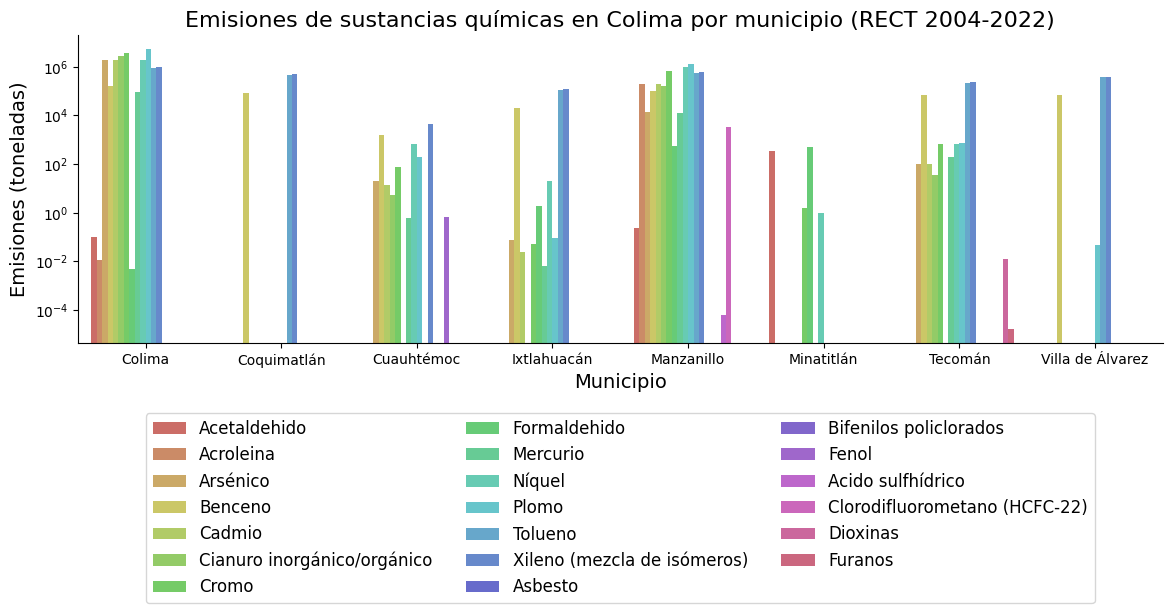

In [255]:

fig, ax = plt.subplots(figsize=(14, 4))

ax.set_title("Emisiones de sustancias químicas en Colima por municipio (RECT 2004-2022)", fontsize=16)
# put values in log scale
# set scale to log
sns.barplot(x="municipio", y="emisiones", data=df1, hue="sustancia", ax=ax, log=True, palette=pallette)

ax.set_ylabel("Emisiones (toneladas)", fontsize=14)
ax.set_xlabel("Municipio", fontsize=14)

# add beautiful legend

ax.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.2), fontsize=12)
sns.despine()
plt.show()

In [256]:
quimi = dfFinal.sustancia.unique()
quimi.sort()
quimi

array(['Acetaldehido', 'Acido sulfhídrico', 'Acroleina', 'Arsénico',
       'Asbesto', 'Benceno', 'Bifenilos policlorados', 'Cadmio',
       'Cianuro inorgánico/orgánico', 'Clorodifluorometano (HCFC-22)',
       'Cromo', 'Dioxinas', 'Fenol', 'Formaldehido', 'Furanos',
       'Mercurio', 'Níquel', 'Plomo', 'Tolueno',
       'Xileno (mezcla de isómeros)'], dtype=object)

In [257]:
df2 = dfFinal.groupby(by=['sector','municipio'], as_index=False).agg({'emisiones':'sum'}).sort_values(by='emisiones', ascending=False)

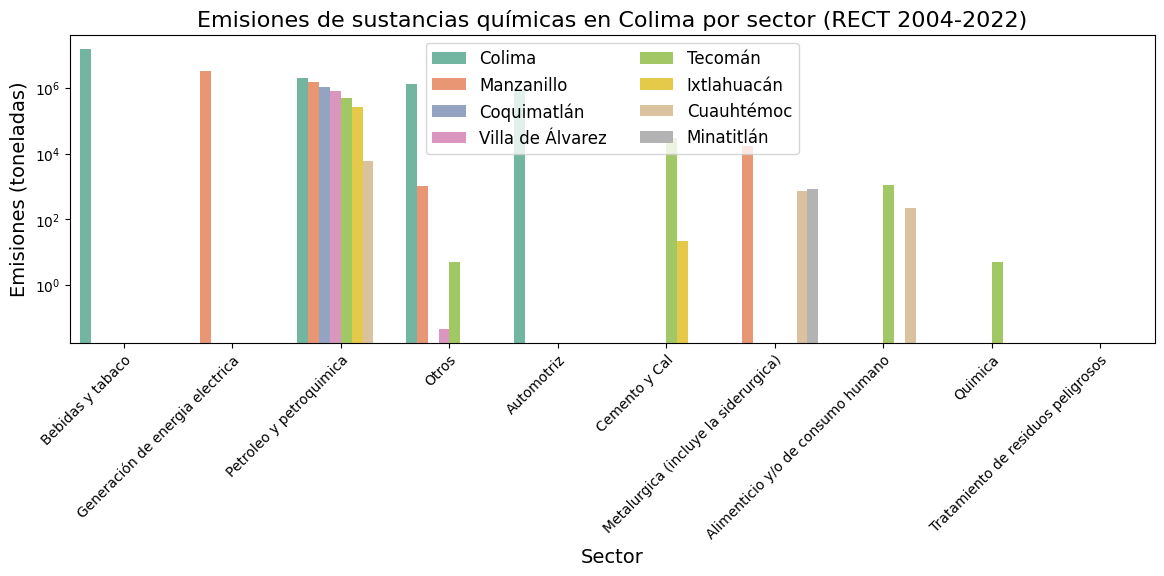

In [258]:

fig, ax = plt.subplots(figsize=(14, 4))

ax.set_title("Emisiones de sustancias químicas en Colima por sector (RECT 2004-2022)", fontsize=16)

# generate a barplot with log scale and summing the values of "emision" column
sns.barplot(x="sector", y="emisiones", data=df2, hue="municipio", ax=ax, log=True, palette="Set2", estimator=sum)

ax.set_ylabel("Emisiones (toneladas)", fontsize=14)
ax.set_xlabel("Sector", fontsize=14)

# add beautiful legend

# rotate xticks 90 degrees
plt.xticks(rotation=45)

ax.legend(loc='upper center', ncol=2,  fontsize=12)

# wrap xticks labels
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

plt.show()

In [259]:
df3 = dfFinal.groupby(by=['sector','sustancia'], as_index=False).agg({'emisiones':'sum'}).sort_values(by='emisiones', ascending=False)

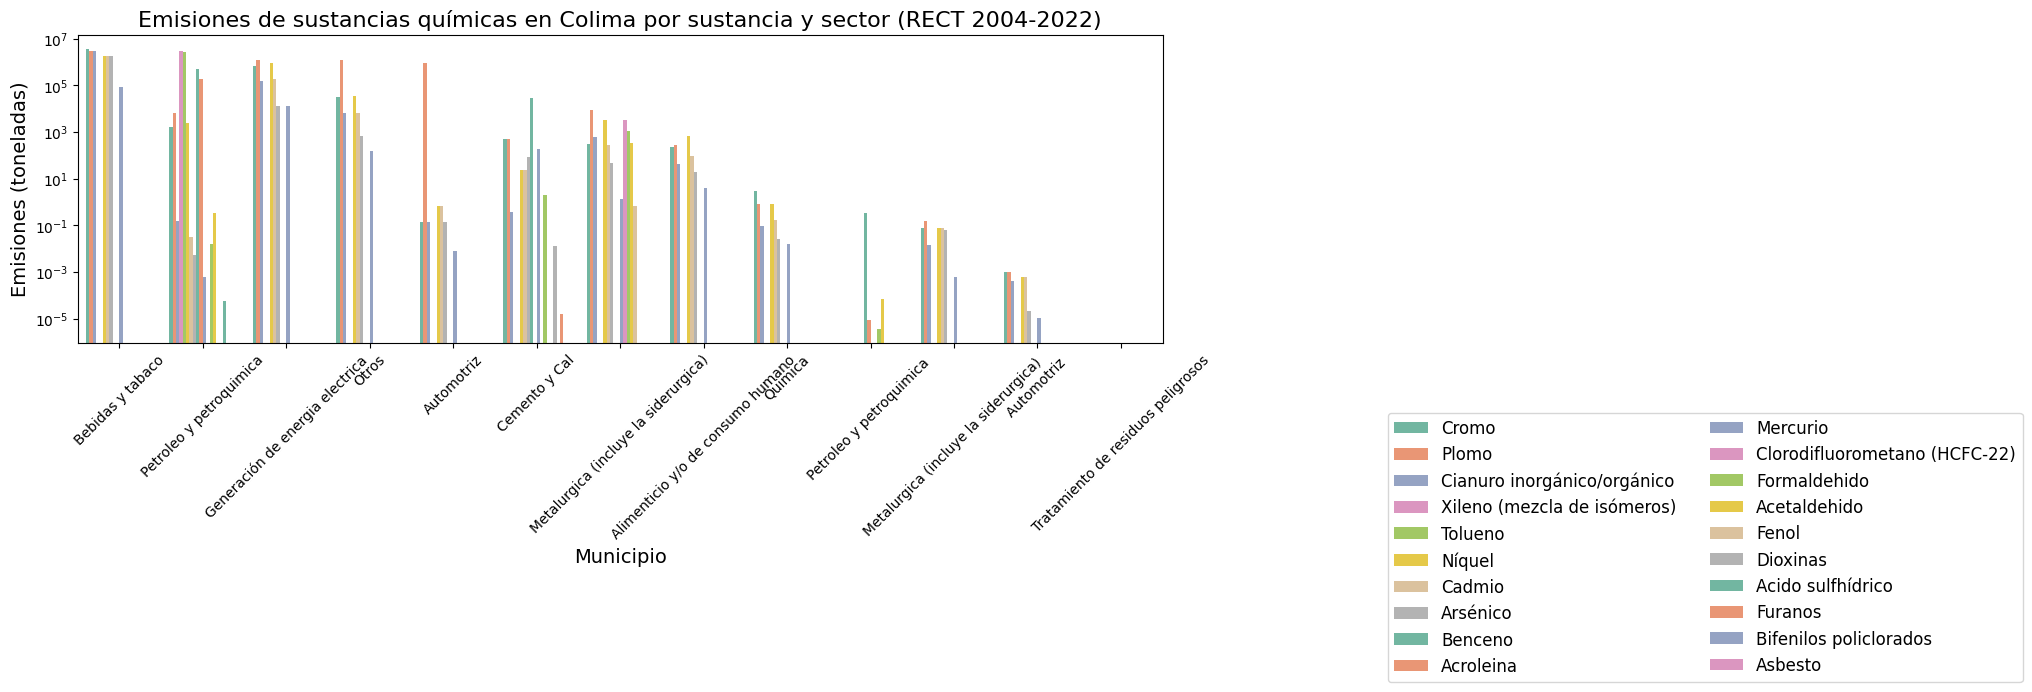

In [260]:

fig, ax = plt.subplots(figsize=(14, 4))

ax.set_title("Emisiones de sustancias químicas en Colima por sustancia y sector (RECT 2004-2022)", fontsize=16)

sns.barplot(x="sector", y="emisiones", data=df3, hue="sustancia", ax=ax, log=True, palette="Set2")

# rotate xticks 90 degrees
plt.xticks(rotation=45)
ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(1.5, -0.2), fontsize=12)

ax.set_ylabel("Emisiones (toneladas)", fontsize=14)
ax.set_xlabel("Municipio", fontsize=14)



plt.show()
